In [55]:
import pandas as pd                           
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score


import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [56]:
df_train = pd.read_csv('https://raw.githubusercontent.com/millaoktavia/Dataset/main/public-train.csv', sep='|')
df_train.head()

,author_id,description,bookformat,bookedition,pages,published_date,publisher_id,reading_age,lexile_measure,grade_level,...,genre_1_weight,genre_2_weight,genre_3_weight,genre_4_weight,genre_5_weight,genre_6_weight,genre_7_weight,genre_8_weight,genre_9_weight,price
0,author2106,"Just after the Second World War, in the small ...",Hardcover,NaN,309.0,NaN,NaN,NaN,NaN,NaN,...,0.22,0.08,0.06,0.05,0.04,0.03,0.02,0.02,0.02,NaN
1,author1018,"Blame it on Hawaii’s rainbows, sparkling beach...",Paperback,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,author1087,"The Pulitzer Prize–winning, bestselling author...",Hardcover,NaN,496.0,NaN,NaN,NaN,NaN,NaN,...,0.22,0.08,0.08,0.05,0.05,0.04,0.02,0.02,0.02,NaN
3,author1295,THINGS ARE ABOUT TO GET SERIOUS FOR HARRY DRES...,Hardcover,First Edition,418.0,NaN,NaN,NaN,NaN,NaN,...,0.30,0.08,0.05,0.04,0.04,0.03,0.02,0.02,0.02,NaN
4,author2622,The Romanovs were the most successful dynasty ...,Hardcover,NaN,784.0,NaN,NaN,NaN,NaN,NaN,...,0.30,0.09,0.08,0.04,0.02,0.01,0.01,0.01,0.01,NaN


In [57]:
df_test = pd.read_csv('https://raw.githubusercontent.com/BerlinRKP/Dataset/main/public-test.csv', sep='|')
df_test.head()

,author_id,description,bookformat,bookedition,pages,published_date,publisher_id,reading_age,lexile_measure,grade_level,...,genre_1_weight,genre_2_weight,genre_3_weight,genre_4_weight,genre_5_weight,genre_6_weight,genre_7_weight,genre_8_weight,genre_9_weight,price
0,author2305,Rachel Friedman has always been the consummate...,Paperback,NaN,295.0,"March 29, 2011",publisher034,NaN,NaN,NaN,...,0.20,0.14,0.03,0.03,0.02,0.02,0.01,0.01,0.01,129789.0
1,author0204,As Dr. Marina Singh embarks upon an uncertain ...,Hardcover,NaN,353.0,"June 7, 2011",publisher155,NaN,990,NaN,...,0.06,0.05,0.05,0.05,0.04,0.04,0.03,0.03,0.03,262465.0
2,author2300,From the moment she took a job on Captain Cald...,Paperback,US edition,373.0,"April 22, 2014",publisher261,NaN,NaN,NaN,...,0.16,0.11,0.06,0.06,0.05,0.04,0.04,0.02,0.02,182195.0
3,author1746,"#1 New York Times bestseller Lisa Gardner, aut...",Hardcover,NaN,423.0,"February 5, 2013",publisher105,NaN,NaN,NaN,...,0.18,0.14,0.13,0.08,0.07,0.04,0.02,0.02,0.02,288596.0
4,author1716,This is not your mother’s memoir. In The Chron...,Paperback,NaN,310.0,"April 1, 2011",publisher166,NaN,NaN,NaN,...,0.24,0.06,0.06,0.05,0.04,0.03,0.03,0.02,0.01,230270.0


In [58]:
df_train.shape

(3550, 39)

In [59]:
df_train.columns.values

array(['author_id', 'description', 'bookformat', 'bookedition', 'pages',
       'published_date', 'publisher_id', 'reading_age', 'lexile_measure',
       'grade_level', 'weight', 'rating_value_0', 'rating_value_1',
       'rating_count_0', 'rating_count_1', 'dimension_0', 'dimension_1',
       'dimension_2', 'genre_0', 'genre_1', 'genre_2', 'genre_3',
       'genre_4', 'genre_5', 'genre_6', 'genre_7', 'genre_8', 'genre_9',
       'genre_0_weight', 'genre_1_weight', 'genre_2_weight',
       'genre_3_weight', 'genre_4_weight', 'genre_5_weight',
       'genre_6_weight', 'genre_7_weight', 'genre_8_weight',
       'genre_9_weight', 'price'], dtype=object)

In [60]:
#Mengetahui tipe-tipe data masing-masing variabel dan nama-nama variabel dalam dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3550 entries, 0 to 3549
Data columns (total 39 columns):
author_id         3540 non-null object
description       3512 non-null object
bookformat        3537 non-null object
bookedition       231 non-null object
pages             3451 non-null float64
published_date    568 non-null object
publisher_id      568 non-null object
reading_age       126 non-null object
lexile_measure    88 non-null object
grade_level       100 non-null object
weight            519 non-null float64
rating_value_0    3540 non-null float64
rating_value_1    553 non-null float64
rating_count_0    3550 non-null int64
rating_count_1    3550 non-null int64
dimension_0       512 non-null float64
dimension_1       512 non-null float64
dimension_2       499 non-null float64
genre_0           3400 non-null object
genre_1           3353 non-null object
genre_2           3322 non-null object
genre_3           3302 non-null object
genre_4           3270 non-null object
gen

In [61]:
# mengecek data hilang
df_train.isnull().sum()

author_id           10
description         38
bookformat          13
bookedition       3319
pages               99
published_date    2982
publisher_id      2982
reading_age       3424
lexile_measure    3462
grade_level       3450
weight            3031
rating_value_0      10
rating_value_1    2997
rating_count_0       0
rating_count_1       0
dimension_0       3038
dimension_1       3038
dimension_2       3051
genre_0            150
genre_1            197
genre_2            228
genre_3            248
genre_4            280
genre_5            310
genre_6            338
genre_7            378
genre_8            414
genre_9            450
genre_0_weight     150
genre_1_weight     197
genre_2_weight     228
genre_3_weight     248
genre_4_weight     280
genre_5_weight     310
genre_6_weight     338
genre_7_weight     378
genre_8_weight     414
genre_9_weight     450
price             3007
dtype: int64

In [62]:
# mengecek data hilang
df_test.isnull().sum()

author_id           0
description         8
bookformat          0
bookedition       446
pages              20
published_date     31
publisher_id       31
reading_age       381
lexile_measure    403
grade_level       405
weight             62
rating_value_0      0
rating_value_1     56
rating_count_0      0
rating_count_1      0
dimension_0        63
dimension_1        63
dimension_2        81
genre_0            41
genre_1            47
genre_2            55
genre_3            63
genre_4            68
genre_5            73
genre_6            77
genre_7            80
genre_8            82
genre_9            87
genre_0_weight     41
genre_1_weight     47
genre_2_weight     55
genre_3_weight     63
genre_4_weight     68
genre_5_weight     73
genre_6_weight     77
genre_7_weight     80
genre_8_weight     82
genre_9_weight     87
price               0
dtype: int64

In [63]:
df_train["bookformat"] = df_train["bookformat"].astype('category')


df_train.dtypes

author_id           object
description         object
bookformat        category
bookedition         object
pages              float64
published_date      object
publisher_id        object
reading_age         object
lexile_measure      object
grade_level         object
weight             float64
rating_value_0     float64
rating_value_1     float64
rating_count_0       int64
rating_count_1       int64
dimension_0        float64
dimension_1        float64
dimension_2        float64
genre_0             object
genre_1             object
genre_2             object
genre_3             object
genre_4             object
genre_5             object
genre_6             object
genre_7             object
genre_8             object
genre_9             object
genre_0_weight     float64
genre_1_weight     float64
genre_2_weight     float64
genre_3_weight     float64
genre_4_weight     float64
genre_5_weight     float64
genre_6_weight     float64
genre_7_weight     float64
genre_8_weight     float64
g

In [64]:
df_train["bookformat"] = df_train["bookformat"].cat.codes


In [65]:
df_test["bookformat"] = df_test["bookformat"].astype('category')

df_test.dtypes

author_id           object
description         object
bookformat        category
bookedition         object
pages              float64
published_date      object
publisher_id        object
reading_age         object
lexile_measure      object
grade_level         object
weight             float64
rating_value_0     float64
rating_value_1     float64
rating_count_0       int64
rating_count_1       int64
dimension_0        float64
dimension_1        float64
dimension_2        float64
genre_0             object
genre_1             object
genre_2             object
genre_3             object
genre_4             object
genre_5             object
genre_6             object
genre_7             object
genre_8             object
genre_9             object
genre_0_weight     float64
genre_1_weight     float64
genre_2_weight     float64
genre_3_weight     float64
genre_4_weight     float64
genre_5_weight     float64
genre_6_weight     float64
genre_7_weight     float64
genre_8_weight     float64
g

In [66]:
df_test["bookformat"] = df_test["bookformat"].cat.codes


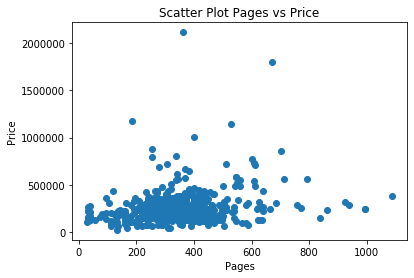

In [67]:
#Menggunakan scatter plot.
plt.scatter(df_test['pages'], df_test['price'])
plt.xlabel('Pages')
plt.ylabel('Price')
plt.title('Scatter Plot Pages vs Price')
plt.show()

In [68]:
# mengecek data hilang
df_test.isnull().sum()

author_id           0
description         8
bookformat          0
bookedition       446
pages              20
published_date     31
publisher_id       31
reading_age       381
lexile_measure    403
grade_level       405
weight             62
rating_value_0      0
rating_value_1     56
rating_count_0      0
rating_count_1      0
dimension_0        63
dimension_1        63
dimension_2        81
genre_0            41
genre_1            47
genre_2            55
genre_3            63
genre_4            68
genre_5            73
genre_6            77
genre_7            80
genre_8            82
genre_9            87
genre_0_weight     41
genre_1_weight     47
genre_2_weight     55
genre_3_weight     63
genre_4_weight     68
genre_5_weight     73
genre_6_weight     77
genre_7_weight     80
genre_8_weight     82
genre_9_weight     87
price               0
dtype: int64

In [69]:
# mengecek data hilang
df_train.isnull().sum()

author_id           10
description         38
bookformat           0
bookedition       3319
pages               99
published_date    2982
publisher_id      2982
reading_age       3424
lexile_measure    3462
grade_level       3450
weight            3031
rating_value_0      10
rating_value_1    2997
rating_count_0       0
rating_count_1       0
dimension_0       3038
dimension_1       3038
dimension_2       3051
genre_0            150
genre_1            197
genre_2            228
genre_3            248
genre_4            280
genre_5            310
genre_6            338
genre_7            378
genre_8            414
genre_9            450
genre_0_weight     150
genre_1_weight     197
genre_2_weight     228
genre_3_weight     248
genre_4_weight     280
genre_5_weight     310
genre_6_weight     338
genre_7_weight     378
genre_8_weight     414
genre_9_weight     450
price             3007
dtype: int64

In [70]:
df_train = df_train.dropna(subset=['price'],axis=0)
df_train.head()

,author_id,description,bookformat,bookedition,pages,published_date,publisher_id,reading_age,lexile_measure,grade_level,...,genre_1_weight,genre_2_weight,genre_3_weight,genre_4_weight,genre_5_weight,genre_6_weight,genre_7_weight,genre_8_weight,genre_9_weight,price
9,author0932,"At long last, New York Times bestselling autho...",5,NaN,504.0,"February 28, 2012",publisher149,NaN,NaN,NaN,...,0.21,0.17,0.10,0.08,0.05,0.04,0.04,0.03,0.02,98172.0
17,author2279,I sold my future to the man who ruined my past...,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57604.0
29,author2386,"From Rob Thomas, the creator of groundbreaking...",7,NaN,324.0,"March 25, 2014",publisher381,NaN,NaN,NaN,...,0.19,0.07,0.07,0.06,0.05,0.04,0.04,0.03,0.02,103658.0
33,author2769,"Hannis Arc, working on the tapestry of lines l...",2,NaN,528.0,"August 16, 2011",publisher099,NaN,NaN,NaN,...,0.07,0.05,0.02,0.02,0.02,0.02,0.01,0.01,0.01,649665.0
44,author0473,C.A. Nicholas's magnum opus symphony is about ...,7,NaN,500.0,"May 5, 2019",publisher184,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,247883.0


In [71]:
df_train['pages'] = df_train['pages'].fillna(method='ffill')
df_train['weight'] = df_train['weight'].fillna(method='ffill')
df_train['rating_value_0'] = df_train['rating_value_0'].fillna(method='ffill')
df_train['rating_value_1'] = df_train['rating_value_1'].fillna(method='ffill')
df_train['dimension_0'] = df_train['dimension_0'].fillna(method='ffill')
df_train['dimension_1'] = df_train['dimension_1'].fillna(method='ffill')
df_train['genre_0_weight'] = df_train['genre_0_weight'].fillna(method='ffill')
df_train['genre_1_weight'] = df_train['genre_1_weight'].fillna(method='ffill')
df_train['genre_2_weight'] = df_train['genre_2_weight'].fillna(method='ffill')
df_train['genre_3_weight'] = df_train['genre_3_weight'].fillna(method='ffill')
df_train['genre_4_weight'] = df_train['genre_4_weight'].fillna(method='ffill')

df_train.head()

,author_id,description,bookformat,bookedition,pages,published_date,publisher_id,reading_age,lexile_measure,grade_level,...,genre_1_weight,genre_2_weight,genre_3_weight,genre_4_weight,genre_5_weight,genre_6_weight,genre_7_weight,genre_8_weight,genre_9_weight,price
9,author0932,"At long last, New York Times bestselling autho...",5,NaN,504.0,"February 28, 2012",publisher149,NaN,NaN,NaN,...,0.21,0.17,0.10,0.08,0.05,0.04,0.04,0.03,0.02,98172.0
17,author2279,I sold my future to the man who ruined my past...,3,NaN,504.0,NaN,NaN,NaN,NaN,NaN,...,0.21,0.17,0.10,0.08,NaN,NaN,NaN,NaN,NaN,57604.0
29,author2386,"From Rob Thomas, the creator of groundbreaking...",7,NaN,324.0,"March 25, 2014",publisher381,NaN,NaN,NaN,...,0.19,0.07,0.07,0.06,0.05,0.04,0.04,0.03,0.02,103658.0
33,author2769,"Hannis Arc, working on the tapestry of lines l...",2,NaN,528.0,"August 16, 2011",publisher099,NaN,NaN,NaN,...,0.07,0.05,0.02,0.02,0.02,0.02,0.01,0.01,0.01,649665.0
44,author0473,C.A. Nicholas's magnum opus symphony is about ...,7,NaN,500.0,"May 5, 2019",publisher184,NaN,NaN,NaN,...,0.07,0.05,0.02,0.02,NaN,NaN,NaN,NaN,NaN,247883.0


In [72]:
df_test['pages'] = df_test['pages'].fillna(method='ffill')
df_test['weight'] = df_test['weight'].fillna(method='ffill')
df_test['rating_value_0'] = df_test['rating_value_0'].fillna(method='ffill')
df_test['rating_value_1'] = df_test['rating_value_1'].fillna(method='ffill')
df_test['dimension_0'] = df_test['dimension_0'].interpolate()
df_test['dimension_1'] = df_test['dimension_1'].fillna(method='ffill')
df_test['genre_0_weight'] = df_test['genre_0_weight'].fillna(method='ffill')
df_test['genre_1_weight'] = df_test['genre_1_weight'].fillna(method='ffill')
df_test['genre_2_weight'] = df_test['genre_2_weight'].fillna(method='ffill')
df_test['genre_3_weight'] = df_test['genre_3_weight'].fillna(method='ffill')
df_test['genre_4_weight'] = df_test['genre_4_weight'].fillna(method='ffill')
df_test.head()

,author_id,description,bookformat,bookedition,pages,published_date,publisher_id,reading_age,lexile_measure,grade_level,...,genre_1_weight,genre_2_weight,genre_3_weight,genre_4_weight,genre_5_weight,genre_6_weight,genre_7_weight,genre_8_weight,genre_9_weight,price
0,author2305,Rachel Friedman has always been the consummate...,4,NaN,295.0,"March 29, 2011",publisher034,NaN,NaN,NaN,...,0.20,0.14,0.03,0.03,0.02,0.02,0.01,0.01,0.01,129789.0
1,author0204,As Dr. Marina Singh embarks upon an uncertain ...,1,NaN,353.0,"June 7, 2011",publisher155,NaN,990,NaN,...,0.06,0.05,0.05,0.05,0.04,0.04,0.03,0.03,0.03,262465.0
2,author2300,From the moment she took a job on Captain Cald...,4,US edition,373.0,"April 22, 2014",publisher261,NaN,NaN,NaN,...,0.16,0.11,0.06,0.06,0.05,0.04,0.04,0.02,0.02,182195.0
3,author1746,"#1 New York Times bestseller Lisa Gardner, aut...",1,NaN,423.0,"February 5, 2013",publisher105,NaN,NaN,NaN,...,0.18,0.14,0.13,0.08,0.07,0.04,0.02,0.02,0.02,288596.0
4,author1716,This is not your mother’s memoir. In The Chron...,4,NaN,310.0,"April 1, 2011",publisher166,NaN,NaN,NaN,...,0.24,0.06,0.06,0.05,0.04,0.03,0.03,0.02,0.01,230270.0


In [73]:
df=df_train.drop(columns=['author_id','description','bookedition','published_date','publisher_id','reading_age','lexile_measure','grade_level','genre_5','genre_6','genre_7','genre_8','genre_9','dimension_2'])
df.head()

,bookformat,pages,weight,rating_value_0,rating_value_1,rating_count_0,rating_count_1,dimension_0,dimension_1,genre_0,...,genre_1_weight,genre_2_weight,genre_3_weight,genre_4_weight,genre_5_weight,genre_6_weight,genre_7_weight,genre_8_weight,genre_9_weight,price
9,5,504.0,3628.74,4.29,4.6,26983,504,10.72,3.30,Paranormal Romance,...,0.21,0.17,0.10,0.08,0.05,0.04,0.04,0.03,0.02,98172.0
17,3,504.0,3628.74,4.89,4.6,27,1,10.72,3.30,NaN,...,0.21,0.17,0.10,0.08,NaN,NaN,NaN,NaN,NaN,57604.0
29,7,324.0,3991.61,3.99,4.6,43657,1537,13.31,1.85,Mystery,...,0.19,0.07,0.07,0.06,0.05,0.04,0.04,0.03,0.02,103658.0
33,2,528.0,771.11,3.68,4.3,19382,1504,16.51,4.32,Fantasy,...,0.07,0.05,0.02,0.02,0.02,0.02,0.01,0.01,0.01,649665.0
44,7,500.0,725.75,3.81,3.6,32,9,15.24,3.17,NaN,...,0.07,0.05,0.02,0.02,NaN,NaN,NaN,NaN,NaN,247883.0


In [74]:
df_1=df_test.drop(columns=['author_id','description','bookedition','published_date','publisher_id','reading_age','lexile_measure','grade_level','genre_5','genre_6','genre_7','genre_8','genre_9','dimension_2'])
df_1.head()

,bookformat,pages,weight,rating_value_0,rating_value_1,rating_count_0,rating_count_1,dimension_0,dimension_1,genre_0,...,genre_1_weight,genre_2_weight,genre_3_weight,genre_4_weight,genre_5_weight,genre_6_weight,genre_7_weight,genre_8_weight,genre_9_weight,price
0,4,295.0,3628.74,3.79,4.4,3412,178,13.21,1.78,Travel,...,0.20,0.14,0.03,0.03,0.02,0.02,0.01,0.01,0.01,129789.0
1,1,353.0,521.63,3.88,4.1,168718,2908,15.24,2.97,Fiction,...,0.06,0.05,0.05,0.05,0.04,0.04,0.03,0.03,0.03,262465.0
2,4,373.0,5443.10,3.96,4.5,6845,304,13.97,2.54,Science Fiction,...,0.16,0.11,0.06,0.06,0.05,0.04,0.04,0.02,0.02,182195.0
3,1,423.0,680.39,4.07,4.6,30037,1887,16.51,3.68,Mystery,...,0.18,0.14,0.13,0.08,0.07,0.04,0.02,0.02,0.02,288596.0
4,4,310.0,453.59,4.23,4.4,9193,463,14.22,2.03,Memoir,...,0.24,0.06,0.06,0.05,0.04,0.03,0.03,0.02,0.01,230270.0


In [75]:
df.isnull().sum()

bookformat          0
pages               0
weight              0
rating_value_0      0
rating_value_1      0
rating_count_0      0
rating_count_1      0
dimension_0         0
dimension_1         0
genre_0            51
genre_1            63
genre_2            68
genre_3            72
genre_4            83
genre_0_weight      0
genre_1_weight      0
genre_2_weight      0
genre_3_weight      0
genre_4_weight      0
genre_5_weight     90
genre_6_weight     98
genre_7_weight    101
genre_8_weight    108
genre_9_weight    113
price               0
dtype: int64

In [76]:
df = df.dropna(axis=0)
df.head()

,bookformat,pages,weight,rating_value_0,rating_value_1,rating_count_0,rating_count_1,dimension_0,dimension_1,genre_0,...,genre_1_weight,genre_2_weight,genre_3_weight,genre_4_weight,genre_5_weight,genre_6_weight,genre_7_weight,genre_8_weight,genre_9_weight,price
9,5,504.0,3628.74,4.29,4.6,26983,504,10.72,3.30,Paranormal Romance,...,0.21,0.17,0.10,0.08,0.05,0.04,0.04,0.03,0.02,98172.0
29,7,324.0,3991.61,3.99,4.6,43657,1537,13.31,1.85,Mystery,...,0.19,0.07,0.07,0.06,0.05,0.04,0.04,0.03,0.02,103658.0
33,2,528.0,771.11,3.68,4.3,19382,1504,16.51,4.32,Fantasy,...,0.07,0.05,0.02,0.02,0.02,0.02,0.01,0.01,0.01,649665.0
49,2,304.0,544.31,3.80,4.3,1415,60,16.08,2.77,Memoir,...,0.25,0.22,0.04,0.03,0.03,0.03,0.03,0.03,0.02,117806.0
50,2,535.0,680.39,4.25,4.7,454617,5533,15.24,3.05,Fantasy,...,0.24,0.09,0.09,0.06,0.05,0.04,0.04,0.03,0.03,122281.0


In [77]:
df_1 = df_1.dropna(axis=0)
df_1.head()

,bookformat,pages,weight,rating_value_0,rating_value_1,rating_count_0,rating_count_1,dimension_0,dimension_1,genre_0,...,genre_1_weight,genre_2_weight,genre_3_weight,genre_4_weight,genre_5_weight,genre_6_weight,genre_7_weight,genre_8_weight,genre_9_weight,price
0,4,295.0,3628.74,3.79,4.4,3412,178,13.21,1.78,Travel,...,0.20,0.14,0.03,0.03,0.02,0.02,0.01,0.01,0.01,129789.0
1,1,353.0,521.63,3.88,4.1,168718,2908,15.24,2.97,Fiction,...,0.06,0.05,0.05,0.05,0.04,0.04,0.03,0.03,0.03,262465.0
2,4,373.0,5443.10,3.96,4.5,6845,304,13.97,2.54,Science Fiction,...,0.16,0.11,0.06,0.06,0.05,0.04,0.04,0.02,0.02,182195.0
3,1,423.0,680.39,4.07,4.6,30037,1887,16.51,3.68,Mystery,...,0.18,0.14,0.13,0.08,0.07,0.04,0.02,0.02,0.02,288596.0
4,4,310.0,453.59,4.23,4.4,9193,463,14.22,2.03,Memoir,...,0.24,0.06,0.06,0.05,0.04,0.03,0.03,0.02,0.01,230270.0


In [78]:
df.shape

(430, 25)

In [79]:
df_1.shape

(413, 25)

In [80]:
df_train['bookformat'].value_counts()

2     363
7     100
3      59
5      16
10      1
9       1
8       1
1       1
0       1
Name: bookformat, dtype: int64

In [81]:
df["genre_0"] = df["genre_0"].astype('category')
df["genre_1"] = df["genre_1"].astype('category')
df["genre_2"] = df["genre_2"].astype('category')
df["genre_3"] = df["genre_3"].astype('category')
df["genre_4"] = df["genre_4"].astype('category')
df["bookformat"] = df["bookformat"].astype('category')

df.dtypes

bookformat        category
pages              float64
weight             float64
rating_value_0     float64
rating_value_1     float64
rating_count_0       int64
rating_count_1       int64
dimension_0        float64
dimension_1        float64
genre_0           category
genre_1           category
genre_2           category
genre_3           category
genre_4           category
genre_0_weight     float64
genre_1_weight     float64
genre_2_weight     float64
genre_3_weight     float64
genre_4_weight     float64
genre_5_weight     float64
genre_6_weight     float64
genre_7_weight     float64
genre_8_weight     float64
genre_9_weight     float64
price              float64
dtype: object

In [82]:
df_1["genre_0"] = df_1["genre_0"].astype('category')
df_1["genre_1"] = df_1["genre_1"].astype('category')
df_1["genre_2"] = df_1["genre_2"].astype('category')
df_1["genre_3"] = df_1["genre_3"].astype('category')
df_1["genre_4"] = df_1["genre_4"].astype('category')
df_1["bookformat"] = df_1["bookformat"].astype('category')

df_1.dtypes

bookformat        category
pages              float64
weight             float64
rating_value_0     float64
rating_value_1     float64
rating_count_0       int64
rating_count_1       int64
dimension_0        float64
dimension_1        float64
genre_0           category
genre_1           category
genre_2           category
genre_3           category
genre_4           category
genre_0_weight     float64
genre_1_weight     float64
genre_2_weight     float64
genre_3_weight     float64
genre_4_weight     float64
genre_5_weight     float64
genre_6_weight     float64
genre_7_weight     float64
genre_8_weight     float64
genre_9_weight     float64
price              float64
dtype: object

In [83]:
#Encoding data dengan kategori sangat banyak
df["genre_0"] = df["genre_0"].cat.codes
df["genre_1"] = df["genre_1"].cat.codes
df["genre_2"] = df["genre_2"].cat.codes
df["genre_3"] = df["genre_3"].cat.codes
df["genre_4"] = df["genre_4"].cat.codes
df["bookformat"] = df["bookformat"].cat.codes

df.head()

,bookformat,pages,weight,rating_value_0,rating_value_1,rating_count_0,rating_count_1,dimension_0,dimension_1,genre_0,...,genre_1_weight,genre_2_weight,genre_3_weight,genre_4_weight,genre_5_weight,genre_6_weight,genre_7_weight,genre_8_weight,genre_9_weight,price
9,3,504.0,3628.74,4.29,4.6,26983,504,10.72,3.30,23,...,0.21,0.17,0.10,0.08,0.05,0.04,0.04,0.03,0.02,98172.0
29,4,324.0,3991.61,3.99,4.6,43657,1537,13.31,1.85,20,...,0.19,0.07,0.07,0.06,0.05,0.04,0.04,0.03,0.02,103658.0
33,1,528.0,771.11,3.68,4.3,19382,1504,16.51,4.32,6,...,0.07,0.05,0.02,0.02,0.02,0.02,0.01,0.01,0.01,649665.0
49,1,304.0,544.31,3.80,4.3,1415,60,16.08,2.77,17,...,0.25,0.22,0.04,0.03,0.03,0.03,0.03,0.03,0.02,117806.0
50,1,535.0,680.39,4.25,4.7,454617,5533,15.24,3.05,6,...,0.24,0.09,0.09,0.06,0.05,0.04,0.04,0.03,0.03,122281.0


In [84]:
#Encoding data dengan kategori sangat banyak
df_1["genre_0"] = df_1["genre_0"].cat.codes
df_1["genre_1"] = df_1["genre_1"].cat.codes
df_1["genre_2"] = df_1["genre_2"].cat.codes
df_1["genre_3"] = df_1["genre_3"].cat.codes
df_1["genre_4"] = df_1["genre_4"].cat.codes
df_1["bookformat"] = df_1["bookformat"].cat.codes

df_1.head()

,bookformat,pages,weight,rating_value_0,rating_value_1,rating_count_0,rating_count_1,dimension_0,dimension_1,genre_0,...,genre_1_weight,genre_2_weight,genre_3_weight,genre_4_weight,genre_5_weight,genre_6_weight,genre_7_weight,genre_8_weight,genre_9_weight,price
0,4,295.0,3628.74,3.79,4.4,3412,178,13.21,1.78,39,...,0.20,0.14,0.03,0.03,0.02,0.02,0.01,0.01,0.01,129789.0
1,1,353.0,521.63,3.88,4.1,168718,2908,15.24,2.97,10,...,0.06,0.05,0.05,0.05,0.04,0.04,0.03,0.03,0.03,262465.0
2,4,373.0,5443.10,3.96,4.5,6845,304,13.97,2.54,34,...,0.16,0.11,0.06,0.06,0.05,0.04,0.04,0.02,0.02,182195.0
3,1,423.0,680.39,4.07,4.6,30037,1887,16.51,3.68,22,...,0.18,0.14,0.13,0.08,0.07,0.04,0.02,0.02,0.02,288596.0
4,4,310.0,453.59,4.23,4.4,9193,463,14.22,2.03,19,...,0.24,0.06,0.06,0.05,0.04,0.03,0.03,0.02,0.01,230270.0


In [85]:
df_1.corr()

,bookformat,pages,weight,rating_value_0,rating_value_1,rating_count_0,rating_count_1,dimension_0,dimension_1,genre_0,...,genre_1_weight,genre_2_weight,genre_3_weight,genre_4_weight,genre_5_weight,genre_6_weight,genre_7_weight,genre_8_weight,genre_9_weight,price
bookformat,1.000000,-0.048838,0.245609,-0.000051,-0.068250,-0.058339,-0.044598,-0.228085,-0.131228,0.107869,...,-0.081840,-0.010536,-0.031330,0.006312,0.036548,0.046094,0.023804,0.046414,-0.005492,-0.218164
pages,-0.048838,1.000000,-0.357019,0.137650,-0.058782,0.208803,0.223289,-0.254271,0.262752,-0.162118,...,-0.020515,-0.054903,-0.075621,-0.111537,-0.041970,-0.028450,-0.025042,-0.001803,0.053329,0.194081
weight,0.245609,-0.357019,1.000000,-0.053215,0.041789,-0.095751,-0.120822,-0.020458,-0.176975,0.085782,...,-0.104242,-0.033511,0.028655,0.066964,0.046999,0.032376,0.073617,0.010745,0.005800,-0.163143
rating_value_0,-0.000051,0.137650,-0.053215,1.000000,0.725328,0.108103,0.161079,0.082974,0.035793,-0.017475,...,-0.128021,0.004923,0.090884,0.065633,0.069618,0.128737,0.120048,0.023821,0.032483,-0.004454
rating_value_1,-0.068250,-0.058782,0.041789,0.725328,1.000000,0.053061,0.066600,0.141014,-0.011839,0.084197,...,-0.024463,0.095979,0.119972,0.123070,0.098247,0.097524,0.089885,-0.000870,-0.057575,-0.070448
rating_count_0,-0.058339,0.208803,-0.095751,0.108103,0.053061,1.000000,0.697395,0.065320,0.094769,0.037307,...,0.028717,-0.044049,-0.032196,0.037228,0.070357,-0.025398,0.019268,-0.013300,-0.017549,-0.066661
rating_count_1,-0.044598,0.223289,-0.120822,0.161079,0.066600,0.697395,1.000000,0.051258,0.017644,-0.071865,...,0.044030,-0.070912,-0.088098,-0.034210,0.033899,0.023631,0.048561,0.051891,0.023647,-0.024852
dimension_0,-0.228085,-0.254271,-0.020458,0.082974,0.141014,0.065320,0.051258,1.000000,-0.220265,-0.069236,...,-0.025273,-0.123420,-0.129448,-0.116399,-0.182424,-0.185730,-0.170281,-0.193169,-0.211660,0.008113
dimension_1,-0.131228,0.262752,-0.176975,0.035793,-0.011839,0.094769,0.017644,-0.220265,1.000000,-0.010984,...,-0.045341,-0.037934,0.016313,0.030901,0.030347,0.066868,0.076810,0.077082,0.134591,0.058408
genre_0,0.107869,-0.162118,0.085782,-0.017475,0.084197,0.037307,-0.071865,-0.069236,-0.010984,1.000000,...,0.070741,0.152527,0.188075,0.248180,0.236026,0.188030,0.146686,0.109920,0.137268,-0.105141


In [86]:
#Memilih Variabel Target dan Variabel Independent
y=df['price']
x=df.drop(columns=['price'])

#Mengubah data menjadi array
y=np.array(y)
x=np.array(x)

In [87]:
#Memilih Variabel Target dan Variabel Independent
y=df_1['price']
x=df_1.drop(columns=['price'])

#Mengubah data menjadi array
y=np.array(y)
x=np.array(x)


In [88]:
x_train = df.drop('price', axis=1)
y_train = df['price']

In [89]:
x_test = df_1.drop('price', axis=1)
y_test = df_1['price']

In [90]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [91]:
lin_reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [92]:
print(lin_reg.coef_)
print(lin_reg.intercept_)

[-1.93178717e+04  2.19471509e+02 -1.83696602e+00 -1.28700347e+05
  5.02033750e+04  6.68308147e-04 -2.31561229e+00  3.18684295e+03
  2.53574376e+03 -8.41194307e+02 -1.72950976e+02 -7.64414796e+01
  3.47926460e+02 -8.63666431e+01 -1.59020983e+05 -4.13472111e+04
 -1.07078174e+05  7.60113979e+04 -1.28535851e+06  5.89913278e+05
  3.50412441e+05 -3.29284557e+06  1.23310624e+06  3.25721750e+05]
620742.0464073536


In [93]:
#zip(feature_cols, lin_reg.coef_)

In [94]:
y_pred = lin_reg.predict(x_test)

In [95]:
lin_reg.score(x_test, y_test)

0.05863893851961832

In [96]:
lin_reg.predict([[0,123,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])

array([647737.04205408])

In [107]:
lin_reg.predict([[1,123,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])

array([628419.17031243])

In [98]:
lin_reg.predict([[2,123,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])

array([609101.29857077])

In [99]:
lin_reg.predict([[3,123,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])

array([589783.42682912])

In [100]:
lin_reg.predict([[5,123,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])

array([551147.68334581])

In [101]:
lin_reg.predict([[7,123,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])

array([512511.9398625])

In [102]:
lin_reg.predict([[8,123,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])

array([493194.06812085])

In [103]:
lin_reg.predict([[9,123,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])

array([473876.1963792])

In [104]:
lin_reg.predict([[10,123,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])

array([454558.32463754])

In [105]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
from sklearn.metrics import mean_squared_log_error
# We have created a function to print accuracy metrics which can be used
# to get accuracy metrics of all models in upcoming steps
def print_accuracy_report(y_test, y_pred,x_test, model):
 print('R Squared(Accuracy)', metrics.r2_score(y_test, y_pred))   
 print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
 print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
 print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
 print('Root Mean Squared Log Error',np.sqrt(mean_squared_log_error( y_test, y_pred )))


In [106]:
print('R Squared(Accuracy)', metrics.r2_score(y_test, y_pred))   
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R Squared(Accuracy) 0.05863893851961832
Mean Absolute Error: 111642.22554143671
Mean Squared Error: 36830341860.627266
Root Mean Squared Error: 191912.3285790344
